# Supplementary Post Read for Numpy-3

In this reading, we'll cover some more useful functionality provided by Numpy

## Content

- **Ravel**
    - `ravel()`
    

- **Generating Random Numbers in Numpy**
    - Uniformly Random Distribution - `randint()`, `rand()`
    - Random Normal Distribution - `normal()`
    
    
- **Image Manipulation**
    - Trim Image

In [ ]:
import numpy as np

### Ravel

Do you remember flatten function? It is used to convert nD array to 1D array.



#### Let's take our $3\times4$ matrix `A`

In [ ]:
A = np.arange(12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
A.flatten()

# Gives 1D vector

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### There's another function which does the same job: `ravel()`

In [ ]:
A.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### Why there are two functions for doing same thing ?

**Flatten returns copy of the array whereas ravel returns view of the array**
**It means if i ravel an array and modify the raveled array, it'll change the original array as well**

In [ ]:
A = np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
B = A.flatten()
B

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
B[0] = 55
B

array([55,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
C = A.ravel()
C

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
C[0] = 55
C

array([55,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
A

array([[55,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Notice how values of A changed when we changed C array.

## Generating Random Numbers in Numpy

### Uniformly Random Distributions

- **Each number** within a specified range is **equally-likely to be generated**

### We have `random` module in `numpy` library

- Let's look at some of its methods


#### `randint()`

- For generating random integer value from discreate uniform distribution


- It takes **low as starting point**


- **high as ending point** (not included)


- Generates a **random integer between the range (low, high)**

In [ ]:
np.random.randint(1, 100)

37

- We can also get an array of randomly generated numbers by **specifying the size**

In [ ]:
np.random.randint(1, 100, 5)

array([55, 76, 60, 69, 57])

#### `rand()`

- Generates a random number continuous uniform distribution
- **Within default range of (0, 1)**

In [ ]:
np.random.rand()

0.24836393235086263

In [ ]:
# We can also specify size - number of random numbers we want

np.random.rand(3)

array([0.38484338, 0.78959355, 0.5066553 ])

#### How can we randomly generate a floating point number b/w 50 and 75?

- We need a **floating point number**


- If we wanted an integer b/w 50 and 75, we would have simply used `randint(50, 75)`


#### So, How can we do this using `rand()`?

In [ ]:
50 + np.random.rand() * 25

72.72680851441402

- We know that **`rand()` gives a floating point number b/w (0, 1)**


- **Size of range** (50, 75) is $75 - 50 = 25$


- We can **scale the output from `rand()`**
    - so that it starts generating floating point numbers from (0, 25)
    
    `np.random.rand() * 25`
    

- Now, we need to **shift the range linearly**
    - so that it starts generating floating point numbers from 50, instead of from 0
    
    `50 + np.random.rand() * 25`

### Random Normal Distributions

- Earlier we saw generating numbers **uniformly randomly**


#### In Normal Distribution


- The probability of generation of numbers follows a **bell curve**


- We have **mean** and **standard deviation**


- The **mean has highest likelihood of being generated**


- **Values close to mean** have **higher likelihood** of being generated


- **Values farther from mean** value have **lower likelihood** of being generated


- Bell curve is **symmetric around mean value**


#### So, we can enforce generation of random numbers so that they follow a Normal Distribution

- We can use `np.random.normal()`

In [ ]:
mu = 100
std = 15
s = np.random.normal(mu, std, 100) # generates 100 values from a Normal Distribution

s

array([101.63562299, 115.58736758,  98.1380799 ,  88.36436575,
       117.18748057,  79.81063476, 104.85914261,  65.73184335,
        99.13185498,  93.36871388, 136.24526668, 120.13122302,
        98.00632849,  79.1084606 ,  91.87796555,  96.80184427,
        97.45057956,  92.11441494, 124.32478319,  73.96886092,
       110.48647792,  97.201054  , 122.92731528,  92.66426874,
        86.28411648, 121.86028623, 109.16930898, 106.25857208,
        94.58083619,  90.86550036,  99.24010157, 121.67538512,
       118.93633791, 110.71536381,  72.57254003, 100.4915161 ,
       112.61074051,  71.88475169, 137.35977478, 109.28228453,
       117.23557851, 103.33974135,  90.57666846,  95.91670475,
        87.67697679,  74.69067004,  90.44286927, 120.70581674,
       102.38992988, 109.43917682, 101.50196907, 113.85788202,
        92.7255881 ,  80.94472255, 110.03679268,  93.55882783,
       105.46557644, 106.59697312, 112.88934353,  73.60986818,
        89.237216  , 111.9048021 , 100.79328633, 109.87

#### If we plot these points against their frequency of generation, they will follow a normal curve


In [ ]:
print(np.mean(s)) # mean of generated points
print(np.std(s)) # std of generated points

100.80779312397524
14.655218984386007


## Image Manipulation


### Trim Image

#### Now, How can we crop an image using Numpy?

- Remember! Image is a numpy array of pixels

- So, We can trim/crop an image in Numpy using Array using **Slicing**.


#### Let's first see the original image

In [ ]:
!gdown 1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI

Downloading...
From: https://drive.google.com/uc?id=1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI
To: H:\Scaler work\dsml-course\05-06-Numpy\emma_stone.jpeg

  0%|          | 0.00/80.3k [00:00<?, ?B/s]
100%|##########| 80.3k/80.3k [00:00<00:00, 610kB/s]
100%|##########| 80.3k/80.3k [00:00<00:00, 605kB/s]


In [ ]:
from matplotlib import pyplot as plt

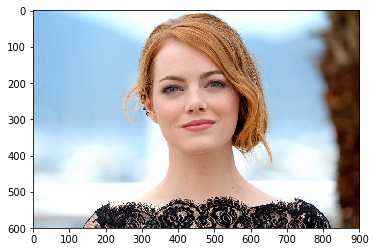

In [ ]:
img = np.array(plt.imread('./emma_stone.jpeg'))

plt.imshow(img)

#### Now, Let's crop the image to get the face only

- If you see x and y axis, the face starts somewhat from ~100 and ends at ~00 on x-axis
    - **x-axis in image is column axis in np array**
    - Columns change along x-axis


- And it lies between ~200 to ~700 on y-axis
    - **y-axis in image is row axis in np array**
    - Rows change along y-axis


#### We'll use this information to slice our image array

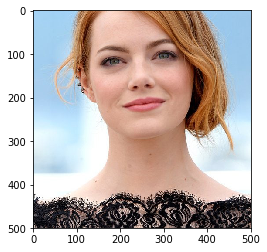

In [ ]:
img_crop = img[100:700, 200:700, :]
plt.imshow(img_crop)

Numpy is really a vast library. There are a lot of functions provided by it, all of which may not be covered in the lecture or in this reading.


However, we'll introduce and explain the functions as and when they will be used in future. Meanwhile, feel free to explore Numpy on your own and carry out some interesting computations.